TO DO:
Problem 2 (Separate file)
PDF file of source codes, results, and plots
GITHUB!

**Import Libraries**

In [621]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/D3.csv"
df = pd.read_csv(url)

**Pre-processing**

In [622]:
x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
Y =  df.values[:,3]

m = len(Y)  # Total number of training samples
n = len(x1) # Total number of features

x0 = np.ones((m,1))
reshaped_x1 = x1.reshape(m,1)
reshaped_x2 = x2.reshape(m,1)
reshaped_x3 = x3.reshape(m,1)

X1 = np.hstack((x0, reshaped_x1))
X2 = np.hstack((x0, reshaped_x2))
X3 = np.hstack((x0, reshaped_x3))

theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)

**Cost function algorithm**

In [623]:
def cost_function(X, Y, theta):
  h_theta = X.dot(theta)
  error = np.subtract(h_theta, Y)

  J = 1/(2*m) * np.sum(np.square(error))
  return J

In [624]:
cost1 = cost_function(X1, Y, theta1)
cost2 = cost_function(X2, Y, theta2)
cost3 = cost_function(X3, Y, theta3)

print('The cost for given values of theta_0 and theta_1 for X1 =', cost1)
print('The cost for given values of theta_0 and theta_1 for X2 =', cost2)
print('The cost for given values of theta_0 and theta_1 for X3 =', cost3)

The cost for given values of theta_0 and theta_1 for X1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for X2 = 5.524438459196242
The cost for given values of theta_0 and theta_1 for X3 = 5.524438459196242


**Gradient descent algorithm**

In [625]:
def gradient_descent(X,Y,theta,alpha,iterations):
  previous_costs = np.zeros(iterations)

  for i in range(iterations):
    h_theta = X.dot(theta)
    error = np.subtract(h_theta, Y)
    gradient = (1 / m) * X.transpose().dot(error)

    theta = theta - (alpha * gradient)

    previous_costs[i] = cost_function(X,Y,theta)

  return theta, previous_costs

**Main**

In [626]:
alpha = 0.01 # Learning Rate
iterations = 1500

theta1, previous_costs_1 = gradient_descent(X1, Y, theta1, alpha, iterations)
theta2, previous_costs_2 = gradient_descent(X2, Y, theta2, alpha, iterations)
theta3, previous_costs_3 = gradient_descent(X3, Y, theta3, alpha, iterations)

print('Linear Model for X1: h(x) = ', theta1[0], " +", theta1[1], "* x")
print('Linear Model for X2: h(x) = ', theta2[0], "+ ", theta2[1], "* x")
print('Linear Model for X3: h(x) = ', theta3[0], "+" , theta3[1], "* x")

Linear Model for X1: h(x) =  5.718506528385593  + -1.9568205977732744 * x
Linear Model for X2: h(x) =  0.7198847334502397 +  0.5639033419472831 * x
Linear Model for X3: h(x) =  2.7804812909944903 + -0.4845163094735121 * x


**Final Regression Model and Loss over Iteration for X1, X2, X3**

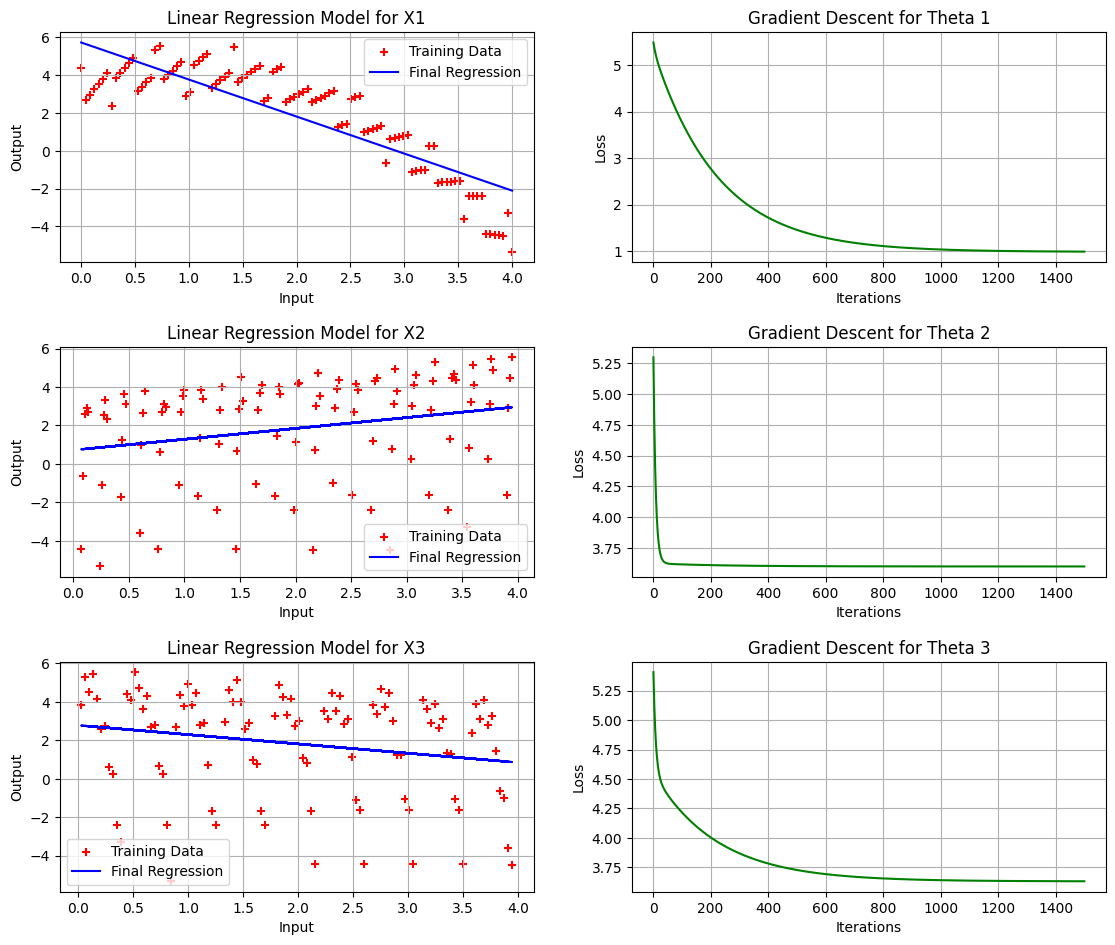

In [627]:
plt.subplots(3,2,figsize=(12,10))
plt.tight_layout(pad=4)
plt.subplot(3,2,1)

# Linear Regression Plot for X1
plt.scatter(X1[:, 1], Y, color='red', marker='+', label='Training Data')
plt.plot(X1[:, 1], X1.dot(theta1), color='blue', label='Final Regression')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X1')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(3,2,2)
# Gradient Descent Plot for X1
Iterations = range(1, iterations+1)
plt.plot(Iterations, previous_costs_1, color='green')

plt.grid(True)
plt.title('Gradient Descent for Theta 1')
plt.xlabel('Iterations')
plt.ylabel('Loss')


# //////////////////////////////////////

plt.subplot(3,2,3)
# Linear Regression Plot for X2
plt.scatter(X2[:, 1], Y, color='red', marker='+', label='Training Data')
plt.plot(X2[:, 1], X2.dot(theta2), color='blue', label='Final Regression')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X2')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(3,2,4)
# Gradient Descent Plots
plt.plot(Iterations, previous_costs_2, color='green')

plt.grid(True)
plt.title('Gradient Descent for Theta 2')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# //////////////////////////////////////

plt.subplot(3,2,5)
# Linear Regression Plot for X3
plt.scatter(X3[:, 1], Y, color='red', marker='+', label='Training Data')
plt.plot(X3[:, 1], X3.dot(theta3), color='blue', label='Final Regression')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X3')
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(3,2,6)
# Gradient Descent Plot
plt.plot(Iterations, previous_costs_3, color='green')

plt.grid(True)
plt.title('Gradient Descent for Theta 3')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()